In [ ]:
#kaggle api token file upload
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mannal2","key":"457a4aa7dd05818b63794d895321ce0e"}'}

In [ ]:
#기타 설정
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#데이터셋 다운로드
!kaggle datasets download -d valentynsichkar/traffic-signs-preprocessed

100% 4.16G/4.16G [00:38<00:00, 189MB/s]
100% 4.16G/4.16G [00:38<00:00, 117MB/s]


In [ ]:
#데이터셋 압축해제
!unzip -o /content/traffic-signs-preprocessed.zip -d /content/datasets/

Archive:  /content/traffic-signs-preprocessed.zip
  inflating: /content/datasets/data0.pickle  
  inflating: /content/datasets/data1.pickle  
  inflating: /content/datasets/data2.pickle  
  inflating: /content/datasets/data3.pickle  
  inflating: /content/datasets/data4.pickle  
  inflating: /content/datasets/data5.pickle  
  inflating: /content/datasets/data6.pickle  
  inflating: /content/datasets/data7.pickle  
  inflating: /content/datasets/data8.pickle  
  inflating: /content/datasets/datasets_preparing.py  
  inflating: /content/datasets/label_names.csv  
  inflating: /content/datasets/labels.pickle  
  inflating: /content/datasets/mean_image_gray.pickle  
  inflating: /content/datasets/mean_image_rgb.pickle  
  inflating: /content/datasets/std_gray.pickle  
  inflating: /content/datasets/std_rgb.pickle  
  inflating: /content/datasets/test.pickle  
  inflating: /content/datasets/train.pickle  
  inflating: /content/datasets/valid.pickle  


In [ ]:
import pickle
import pandas as pd
import numpy as np
#데이터 로드
datasets = pd.read_pickle('/content/datasets/data5.pickle')

In [ ]:
#데이터 분할 및 표준화
train_scaled = datasets['x_train'] / 255.0
train_scaled = train_scaled.reshape(-1, 32, 32, 1)
train_target = datasets['y_train']

val_scaled = datasets['x_validation']/255.0
val_scaled = val_scaled.reshape(-1, 32, 32, 1)
val_target = datasets['y_validation']

test_scaled = datasets['x_test']/255.0
test_scaled = test_scaled.reshape(-1, 32, 32, 1)
test_target = datasets['y_test']

print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)
print(test_scaled.shape, test_target.shape)

(86989, 32, 32, 1) (86989,)
(4410, 32, 32, 1) (4410,)
(12630, 32, 32, 1) (12630,)


In [ ]:
label_names = pd.read_csv('/content/datasets/label_names.csv').to_numpy()
print(label_names)

[[0 'Speed limit (20km/h)']
 [1 'Speed limit (30km/h)']
 [2 'Speed limit (50km/h)']
 [3 'Speed limit (60km/h)']
 [4 'Speed limit (70km/h)']
 [5 'Speed limit (80km/h)']
 [6 'End of speed limit (80km/h)']
 [7 'Speed limit (100km/h)']
 [8 'Speed limit (120km/h)']
 [9 'No passing']
 [10 'No passing for vehicles over 3.5 metric tons']
 [11 'Right-of-way at the next intersection']
 [12 'Priority road']
 [13 'Yield']
 [14 'Stop']
 [15 'No vehicles']
 [16 'Vehicles over 3.5 metric tons prohibited']
 [17 'No entry']
 [18 'General caution']
 [19 'Dangerous curve to the left']
 [20 'Dangerous curve to the right']
 [21 'Double curve']
 [22 'Bumpy road']
 [23 'Slippery road']
 [24 'Road narrows on the right']
 [25 'Road work']
 [26 'Traffic signals']
 [27 'Pedestrians']
 [28 'Children crossing']
 [29 'Bicycles crossing']
 [30 'Beware of ice/snow']
 [31 'Wild animals crossing']
 [32 'End of all speed and passing limits']
 [33 'Turn right ahead']
 [34 'Turn left ahead']
 [35 'Ahead only']
 [36 'Go st

In [ ]:
import matplotlib.pyplot as plt

##합성곱 신경망1 kernel(16-32-64), Dropout 0.3

In [ ]:
from tensorflow import keras
model=keras.Sequential()

model.add(keras.layers.Conv2D(16, kernel_size=3, activation='relu', padding='same', input_shape=(32, 32, 1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [ ]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(43, activation='softmax'))

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 64)          0

In [ ]:
#모델 컴파일과 훈련
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb=keras.callbacks.ModelCheckpoint('best_cnn_model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/20
2719/2719 [==============================] - 15s 5ms/step - loss: 0.0853 - accuracy: 0.9734 - val_loss: 0.1307 - val_accuracy: 0.9685
Epoch 2/20
2719/2719 [==============================] - 14s 5ms/step - loss: 0.0702 - accuracy: 0.9777 - val_loss: 0.1166 - val_accuracy: 0.9751
Epoch 3/20
2719/2719 [==============================] - 13s 5ms/step - loss: 0.0587 - accuracy: 0.9809 - val_loss: 0.1574 - val_accuracy: 0.9683
Epoch 4/20
2719/2719 [==============================] - 14s 5ms/step - loss: 0.0540 - accuracy: 0.9832 - val_loss: 0.1688 - val_accuracy: 0.9717
Epoch 5/20
2719/2719 [==============================] - 13s 5ms/step - loss: 0.0476 - accuracy: 0.9846 - val_loss: 0.1384 - val_accuracy: 0.9732


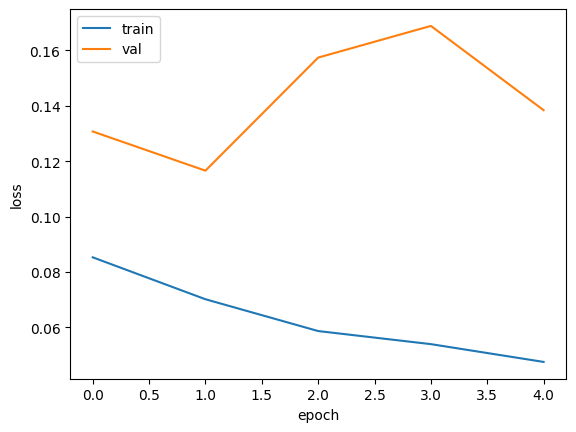

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

##합성곱 신경망1 평가와 예측

In [ ]:
model.evaluate(test_scaled, test_target)

395/395 [==============================] - 1s 3ms/step - loss: 0.2381 - accuracy: 0.9542


[0.23808132112026215, 0.9542359709739685]

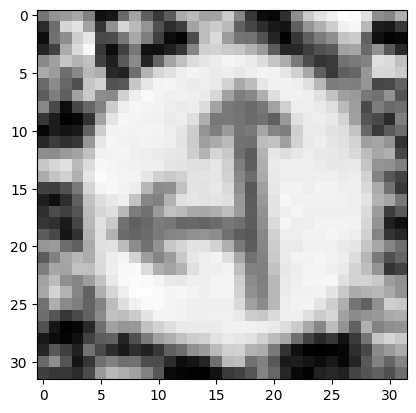

In [ ]:
plt.imshow(val_scaled[1].reshape(32, 32), cmap='gray_r')
plt.show()

In [ ]:
preds=model.predict(val_scaled[1:2])
print(preds)

1/1 [==============================] - 0s 70ms/step
[[2.34462359e-18 4.62029540e-17 6.18271212e-16 3.45840648e-11
  2.07763159e-27 7.36520066e-19 1.15444574e-27 5.37281415e-19
  4.69519865e-19 2.35430685e-11 4.87691495e-17 1.91305617e-11
  5.98792281e-15 1.08596415e-17 1.83009591e-17 1.51126415e-18
  7.75670934e-12 6.46116203e-16 6.27914348e-23 8.65894216e-13
  1.50278129e-22 7.25922347e-14 7.90061286e-21 1.06810694e-09
  7.65918661e-25 5.51275978e-14 5.91248281e-20 7.78572089e-22
  1.91918591e-14 1.87936062e-14 5.34914420e-07 1.39361787e-18
  3.67725675e-19 1.32892481e-14 1.00172709e-11 2.37406013e-07
  2.65435854e-23 9.99999285e-01 1.70584866e-11 5.04878050e-09
  2.42332927e-08 2.55691479e-20 2.36412870e-27]]


In [ ]:
print(label_names[np.argmax(preds)])

[37 'Go straight or left']


##합성곱신경망2 kernel(16-32-64), Dropout 0.4

In [ ]:
model2=keras.Sequential()

model2.add(keras.layers.Conv2D(16, kernel_size=3, activation='relu', padding='same', input_shape=(32, 32, 1)))
model2.add(keras.layers.MaxPooling2D(2))
model2.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model2.add(keras.layers.MaxPooling2D(2))
model2.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model2.add(keras.layers.MaxPooling2D(2))

In [ ]:
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(100, activation='relu'))
model2.add(keras.layers.Dropout(0.4))
model2.add(keras.layers.Dense(43, activation='softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 4, 4, 64)         

In [ ]:
#모델 컴파일과 훈련
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb2=keras.callbacks.ModelCheckpoint('best_cnn_model2.h5')
early_stopping_cb2 = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history2 = model2.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target),
                      callbacks=[checkpoint_cb2, early_stopping_cb2])


Epoch 1/20
2719/2719 [==============================] - 17s 5ms/step - loss: 0.2663 - accuracy: 0.9025 - val_loss: 0.2734 - val_accuracy: 0.9193
Epoch 2/20
2719/2719 [==============================] - 15s 5ms/step - loss: 0.2373 - accuracy: 0.9221 - val_loss: 0.1516 - val_accuracy: 0.9635
Epoch 3/20
2719/2719 [==============================] - 15s 5ms/step - loss: 0.1856 - accuracy: 0.9491 - val_loss: 0.1870 - val_accuracy: 0.9515
Epoch 4/20
2719/2719 [==============================] - 16s 6ms/step - loss: 0.1549 - accuracy: 0.9582 - val_loss: 0.1438 - val_accuracy: 0.9646
Epoch 5/20
2719/2719 [==============================] - 15s 6ms/step - loss: 0.1402 - accuracy: 0.9624 - val_loss: 0.2844 - val_accuracy: 0.9601
Epoch 6/20
2719/2719 [==============================] - 18s 7ms/step - loss: 0.1246 - accuracy: 0.9662 - val_loss: 0.1670 - val_accuracy: 0.9683
Epoch 7/20
2719/2719 [==============================] - 15s 6ms/step - loss: 0.1105 - accuracy: 0.9705 - val_loss: 0.1490 - val_ac

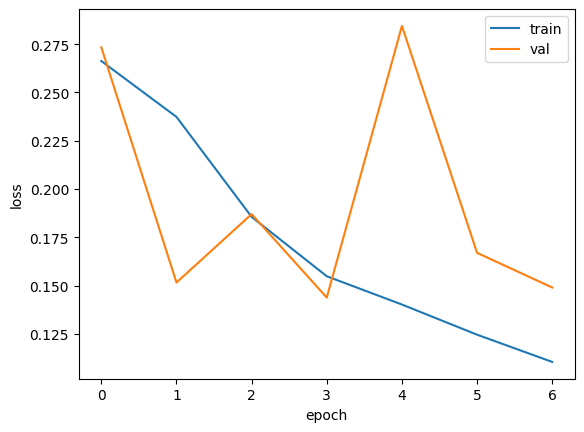

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

##합성곱신경망2 평가와 예측


In [ ]:
model2.evaluate(test_scaled, test_target)

395/395 [==============================] - 1s 3ms/step - loss: 0.3821 - accuracy: 0.9208


[0.38210660219192505, 0.9208234548568726]

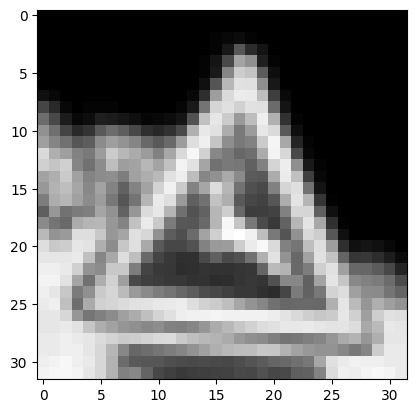

In [ ]:
plt.imshow(val_scaled[2].reshape(32, 32), cmap='gray_r')
plt.show()

In [ ]:
preds2=model.predict(val_scaled[2:3])
print(preds2)

1/1 [==============================] - 0s 19ms/step
[[0.00000000e+00 1.45630818e-29 1.03697686e-35 3.47455481e-26
  0.00000000e+00 2.29369041e-30 0.00000000e+00 0.00000000e+00
  1.49182703e-30 0.00000000e+00 2.44237332e-24 3.51338107e-33
  4.42249128e-35 0.00000000e+00 0.00000000e+00 7.55523682e-35
  0.00000000e+00 0.00000000e+00 7.63318220e-23 3.97080686e-26
  5.09086124e-34 1.56145509e-14 1.69614581e-30 3.11570922e-20
  2.34909764e-36 2.22071286e-16 5.90099097e-29 6.62720527e-35
  2.91009942e-31 2.41579520e-19 2.88520066e-35 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 6.93891933e-36 2.96891963e-33
  0.00000000e+00 0.00000000e+00 0.00000000e+00]]


In [ ]:
print(label_names[np.argmax(preds2)])

[31 'Wild animals crossing']


##합성곱신경망3 kernel(32-64), Dropout 0.3

In [ ]:
model3=keras.Sequential()

model3.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(32, 32, 1)))
model3.add(keras.layers.MaxPooling2D(2))
model3.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model3.add(keras.layers.MaxPooling2D(2))

In [ ]:
model3.add(keras.layers.Flatten())
model3.add(keras.layers.Dense(100, activation='relu'))
model3.add(keras.layers.Dropout(0.3))
model3.add(keras.layers.Dense(43, activation='softmax'))
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 4096)              0         
                                                                 
 dense_6 (Dense)             (None, 100)              

In [ ]:
#모델 컴파일과 훈련
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb3=keras.callbacks.ModelCheckpoint('best_cnn_model3.h5')
early_stopping_cb3 = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history3 = model3.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target),
                      callbacks=[checkpoint_cb3, early_stopping_cb3])


Epoch 1/20
2719/2719 [==============================] - 15s 5ms/step - loss: 0.9561 - accuracy: 0.7256 - val_loss: 0.2480 - val_accuracy: 0.9270
Epoch 2/20
  29/2719 [..............................] - ETA: 10s - loss: 0.3281 - accuracy: 0.9041

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2719/2719 [==============================] - 13s 5ms/step - loss: 0.2967 - accuracy: 0.9090 - val_loss: 0.1564 - val_accuracy: 0.9535
Epoch 3/20
2719/2719 [==============================] - 12s 4ms/step - loss: 0.1985 - accuracy: 0.9393 - val_loss: 0.1528 - val_accuracy: 0.9612
Epoch 4/20
2719/2719 [==============================] - 13s 5ms/step - loss: 0.1485 - accuracy: 0.9532 - val_loss: 0.1097 - val_accuracy: 0.9703
Epoch 5/20
2719/2719 [==============================] - 14s 5ms/step - loss: 0.1186 - accuracy: 0.9616 - val_loss: 0.1106 - val_accuracy: 0.9719
Epoch 6/20
2719/2719 [==============================] - 13s 5ms/step - loss: 0.0959 - accuracy: 0.9691 - val_loss: 0.1035 - val_accuracy: 0.9746
Epoch 7/20
2719/2719 [==============================] - 12s 4ms/step - loss: 0.0796 - accuracy: 0.9743 - val_loss: 0.1359 - val_accuracy: 0.9692
Epoch 8/20
2719/2719 [==============================] - 12s 4ms/step - loss: 0.0710 - accuracy: 0.9770 - val_loss: 0.1623 - val_accuracy: 0.9

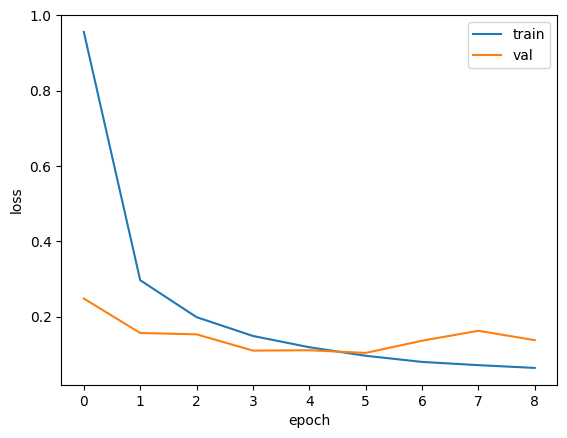

In [ ]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

##합성곱신경망3 평가와 예측


In [ ]:
model3.evaluate(test_scaled, test_target)

395/395 [==============================] - 2s 5ms/step - loss: 0.2165 - accuracy: 0.9516


[0.21652837097644806, 0.9516231417655945]

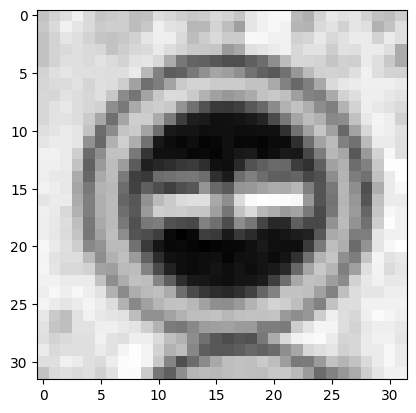

In [ ]:
plt.imshow(val_scaled[3].reshape(32, 32), cmap='gray_r')
plt.show()

In [ ]:
preds3=model.predict(val_scaled[3:4])
print(preds3)

1/1 [==============================] - 0s 56ms/step
[[0.00000000e+00 5.56335204e-32 3.54847401e-30 1.20856641e-21
  2.45215268e-35 6.38334458e-28 0.00000000e+00 2.77316133e-32
  1.66333936e-30 1.00000000e+00 3.21562633e-15 4.07052829e-33
  9.10002402e-18 9.43093751e-23 2.38371829e-27 1.18964221e-15
  7.76133384e-19 1.05477096e-19 0.00000000e+00 1.60594705e-36
  1.42164341e-24 0.00000000e+00 1.09075912e-34 2.40838169e-24
  0.00000000e+00 3.73829632e-38 3.16326563e-35 0.00000000e+00
  1.20791308e-34 4.22210057e-33 0.00000000e+00 1.61621057e-36
  1.13655450e-24 3.00896230e-33 4.09861812e-27 7.75115682e-26
  5.80245416e-24 4.05012331e-36 1.14474293e-25 9.05735039e-27
  9.50467135e-26 4.93985557e-22 6.51705382e-33]]


In [ ]:
print(label_names[np.argmax(preds3)])

[9 'No passing']


##합성곱신경망4 kernel(32-64), Dropout 0.4

In [ ]:
model4=keras.Sequential()

model4.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(32, 32, 1)))
model4.add(keras.layers.MaxPooling2D(2))
model4.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model4.add(keras.layers.MaxPooling2D(2))

In [ ]:
model4.add(keras.layers.Flatten())
model4.add(keras.layers.Dense(100, activation='relu'))
model4.add(keras.layers.Dropout(0.4))
model4.add(keras.layers.Dense(43, activation='softmax'))
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 8, 8, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_4 (Flatten)         (None, 4096)              0         
                                                                 
 dense_8 (Dense)             (None, 100)              

In [ ]:
#모델 컴파일과 훈련
model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb4=keras.callbacks.ModelCheckpoint('best_cnn_model4.h5')
early_stopping_cb4 = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history4 = model4.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target),
                      callbacks=[checkpoint_cb4, early_stopping_cb4])


Epoch 1/20
2719/2719 [==============================] - 14s 4ms/step - loss: 0.9022 - accuracy: 0.7396 - val_loss: 0.1856 - val_accuracy: 0.9490
Epoch 2/20
  22/2719 [..............................] - ETA: 13s - loss: 0.3851 - accuracy: 0.8707

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2719/2719 [==============================] - 15s 5ms/step - loss: 0.2766 - accuracy: 0.9159 - val_loss: 0.1499 - val_accuracy: 0.9630
Epoch 3/20
2719/2719 [==============================] - 13s 5ms/step - loss: 0.1849 - accuracy: 0.9427 - val_loss: 0.1535 - val_accuracy: 0.9667
Epoch 4/20
2719/2719 [==============================] - 13s 5ms/step - loss: 0.1413 - accuracy: 0.9554 - val_loss: 0.1664 - val_accuracy: 0.9692
Epoch 5/20
2719/2719 [==============================] - 13s 5ms/step - loss: 0.1140 - accuracy: 0.9636 - val_loss: 0.1130 - val_accuracy: 0.9732
Epoch 6/20
2719/2719 [==============================] - 12s 4ms/step - loss: 0.0948 - accuracy: 0.9694 - val_loss: 0.1012 - val_accuracy: 0.9778
Epoch 7/20
2719/2719 [==============================] - 12s 5ms/step - loss: 0.0804 - accuracy: 0.9739 - val_loss: 0.1430 - val_accuracy: 0.9755
Epoch 8/20
2719/2719 [==============================] - 13s 5ms/step - loss: 0.0725 - accuracy: 0.9758 - val_loss: 0.1216 - val_accuracy: 0.9

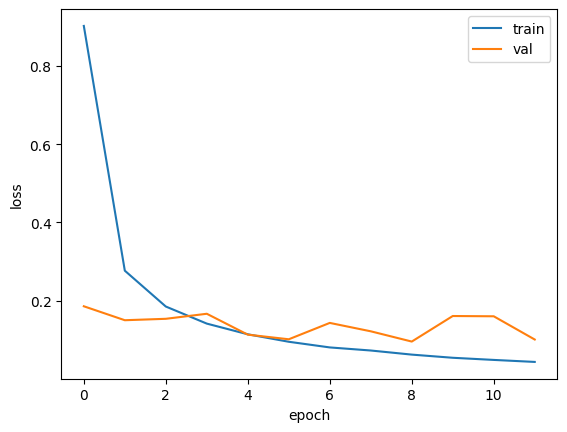

In [ ]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

##합성곱신경망4 평가와 예측

In [ ]:
model4.evaluate(test_scaled, test_target)

395/395 [==============================] - 1s 3ms/step - loss: 0.1739 - accuracy: 0.9618


[0.17391511797904968, 0.9617577195167542]

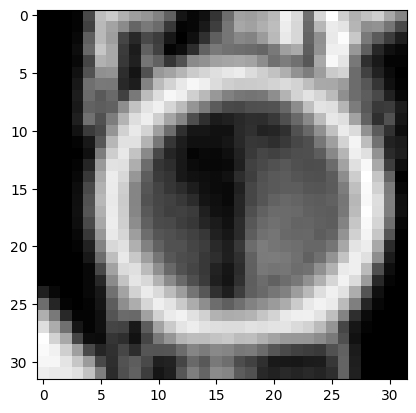

In [ ]:
plt.imshow(val_scaled[4].reshape(32, 32), cmap='gray_r')
plt.show()

In [ ]:
preds4=model.predict(val_scaled[4:5])
print(preds4)

1/1 [==============================] - 0s 19ms/step
[[6.2311398e-30 9.9079983e-23 1.9334176e-17 2.4420483e-12 4.0972613e-18
  5.3751987e-18 0.0000000e+00 1.4026244e-29 9.1405190e-26 2.5363018e-13
  1.4470102e-22 1.0397437e-31 8.7779599e-17 1.9035075e-14 1.9572150e-18
  1.0000000e+00 0.0000000e+00 4.7224965e-30 1.2319633e-18 2.4477893e-34
  1.2616204e-34 4.5927928e-34 1.2207761e-28 9.4758216e-33 6.7201767e-35
  2.0117057e-21 1.0553760e-24 5.7453669e-38 1.3545232e-34 9.4481194e-29
  0.0000000e+00 7.7554024e-22 2.0223727e-26 2.9520211e-28 3.1981500e-27
  9.2540411e-21 1.9565092e-22 2.7932526e-37 1.4317059e-17 1.2876339e-25
  1.0521305e-27 2.5546781e-32 0.0000000e+00]]


In [ ]:
print(label_names[np.argmax(preds4)])

[15 'No vehicles']
